# **Анализ и прогнозирование оттока сотрудников компании IBM**

## Описание задачи

Зачастую увольнение сотрудников дорого обходится компаниям. Затраты приходятся на проведение интервью в процессе поиска замены, бонусы на входе, и потерю производительности работы в течение первых месяцев, пока сотрудник входит в новую роль. Поэтому остро встает вопрос когда и почему сотрудники уходят из компании, что их связывает между собой. Решение этих вопросов позволит качественнее удерживать сотрудников или заранее прогнозировать их отток, чтобы быть к этому готовым.

В этой работе я постараюсь ответить на следующие вопросы:

1. На какие **показатели и индикаторы** сотрудников следует обращать внимание ?
2. Чем **похожи** сотрудники, покидающие компанию ?
3. Какие **действия** необходимо предпринять, чтобы предотвратить отток ?
4. Имеет ли место в решении этой задачи **машинное обучение** ?

Будем решать задачу бинарной классификации с учителем. **Целевой метрикой** будет является метка класса (1 - сотрудник уволился,  0 - сотрудник остался)

| Название колонки | Тип данных | Обозначение  |
| --- | --- | --- |
| Age | Numeric | Возраст |
| Attrition | String | Флаг ухода из компании |
| BusinessTravel | String | Частота командировок |
| DailyRate | Numeric | Ставка в день в долларах |
| Department | String | Департамент |
| DistanceFromHome | Numeric | Расстояние от дома до работы |
| Education | Numeric | Образование |
| EducationField | String | Специальность |
| EmployeeCount | Numeric | Число подчиненных |
| EmployeeNumber | Numeric | Номер |
| EnvironmentSatisfaction | Numeric | Удовлетворенность обстановкой в компании |
| Gender | String | Пол |
| HourlyRate | Numeric | Время работы |
| JobInvolvement | Numeric | Вовлеченность в работу |
| JobLevel | Numeric | Уровень должности |
| JobRole | String | Должность |
| JobSatisfaction | Numeric | Удовлетворенность работй |
| MaritalStatus | String | Семейное положение |
| MonthlyIncome | Numeric | Доход в месяц |
| MonthlyRate | Numeric | Ставка в месяц |
| NumCompaniesWorked | Numeric | Число компаний, где работал сотрудник до текущей компании |
| Over18 | String | Больше 18 лет ? |
| OverTime | String | Работает сверхурочно ? |
| PercentSalaryHike | Numeric | Надбавка к заработной плате |
| PerformanceRating | Numeric | Рейтинг производительности |
| RelationshipSatisfaction | Numeric | Удовлетворение отношением внутри коллектива |
| StandardHours | Numeric | Стандартный график работы |
| StockOptionLevel | Numeric | Сколько акций комании есть у сотрудника ? |
| TotalWorkingYears | Numeric | Продолжительность трудового стажа |
| TrainingTimesLastYear | Numeric | Общее время посещения тренировочных семинаров на работе |
| WorkLifeBalance | Numeric | Соотношение свободного времени и работы |
| YearsAtCompany | Numeric | Продолжительность работы в компании |
| YearsInCurrentRole | Numeric | Продолжительность работы на текущей позиции |
| YearsSinceLastPromotion | Numeric | Сколько прошло с последнего повышения |
| YearsWithCurrManager | Numeric | Продолжительность работы с текущим менеджмером |

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [207]:
df = pd.read_csv('Employee-Attrition.csv')

In [208]:
df.head(3).T

,0,1,2
Age,41,49,37
Attrition,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373
Department,Sales,Research & Development,Research & Development
DistanceFromHome,1,8,2
Education,2,1,2
EducationField,Life Sciences,Life Sciences,Other
EmployeeCount,1,1,1
EmployeeNumber,1,2,4


Некоторые численные признаки представлены **закодированным видом**, для общего понимания следует соотносить закодированное значение - реальный признак.

| Значение | Education | EnvironmentSatisfaction | JobInvolvement | JobSatisfaction | PerformanceRating | RelationshipSatisfaction | WorkLifeBalance |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | Below College | Low | Low | Low | Low | Low | Bad |
| 2 | College | Medium | Medium | Medium | Good | Medium | Good |
| 3 | Bachelor | High | High | High | Excellent | High | Better |
| 4 | Master | Very High | Very High | Very High | Outstanding | Very High | Best |
| 5 | Doctor |  |  |  |  |  |  |

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Пропусков в данных нету, это хорошо, в противном случае пришлось бы либо удалять строки с пропущенными значениями, либо заполнять их средней/медианой, что будет не лучшим образом сказывается на точности будущей модели

Заметим, что некоторые колонки, такие как **StandardHours** и **EmployeeCount**, не несут для нас никакой информации, так как представлены одним константным значением. Также признак **Over18** не несет для нас никакой информации, так как тоже представлен одним строковым значением. Можем спокойно их удалить. А также перекодируем целевую переменную из строкового типа данных в числовое.

In [211]:
df = df.drop(['StandardHours', 'EmployeeCount', 'Over18'],axis=1)

In [212]:
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})

## Визуальный анализ данных

### Корреляция

In [213]:
df.corr()

C:\Users\Renat\AppData\Local\Temp\ipykernel_12100\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


C:\Users\Renat\AppData\Local\Temp\ipykernel_12100\1196068327.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), ax=ax, cmap='coolwarm')


<AxesSubplot: >

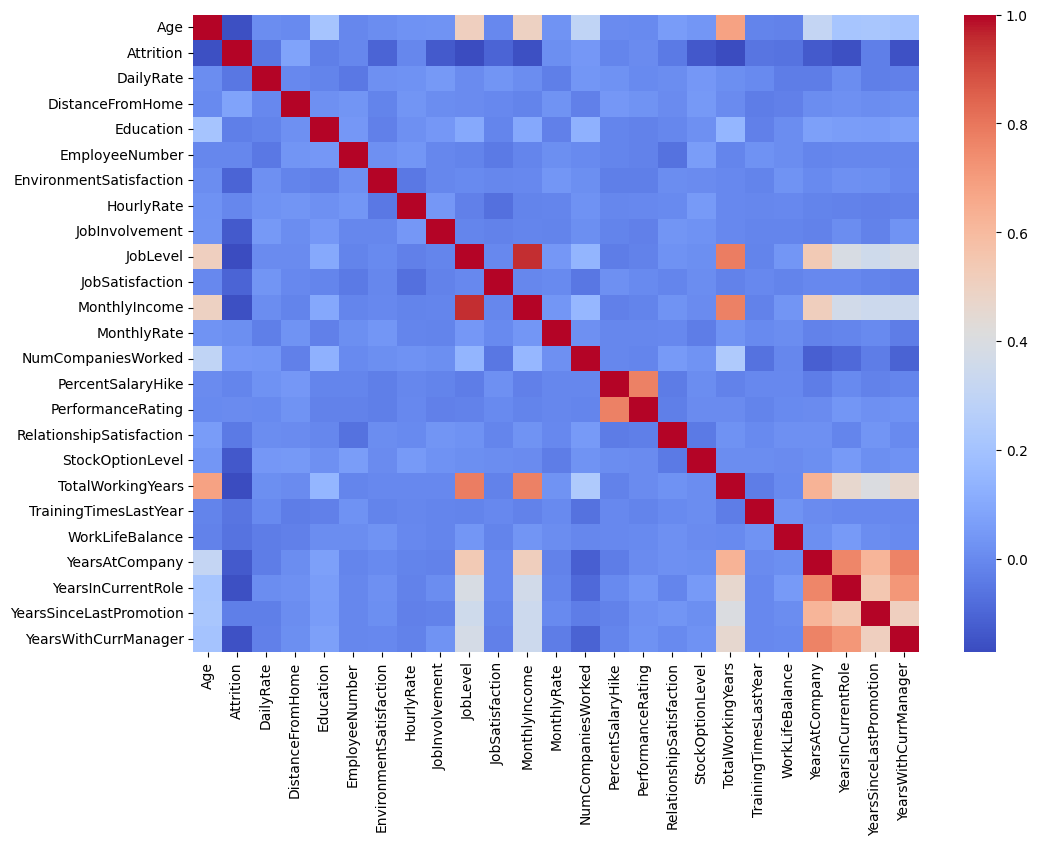

In [214]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(data=df.corr(), ax=ax, cmap='coolwarm')

Между признаком JobLevel и MonthlyIncome - очень сильная линейная взаимосвязь, что логично. Чем выше уровень работы сотрудника, тем больше месячный доход. Соответсвенно, один из признаков, возможно, является избыточным, при обучении модели попробуем в дальнейшем удалить его для повышения качества модели.


Признаки Monthly Rate, Number of Companies Worked и Distance From Home имеют положительную корреляцию с целевым признаком . В то время как Total Working Years, Job Level и Years In Current Role имеют отрицательную корреляцию с ним.

### Распределение числовых признаков и их анализ

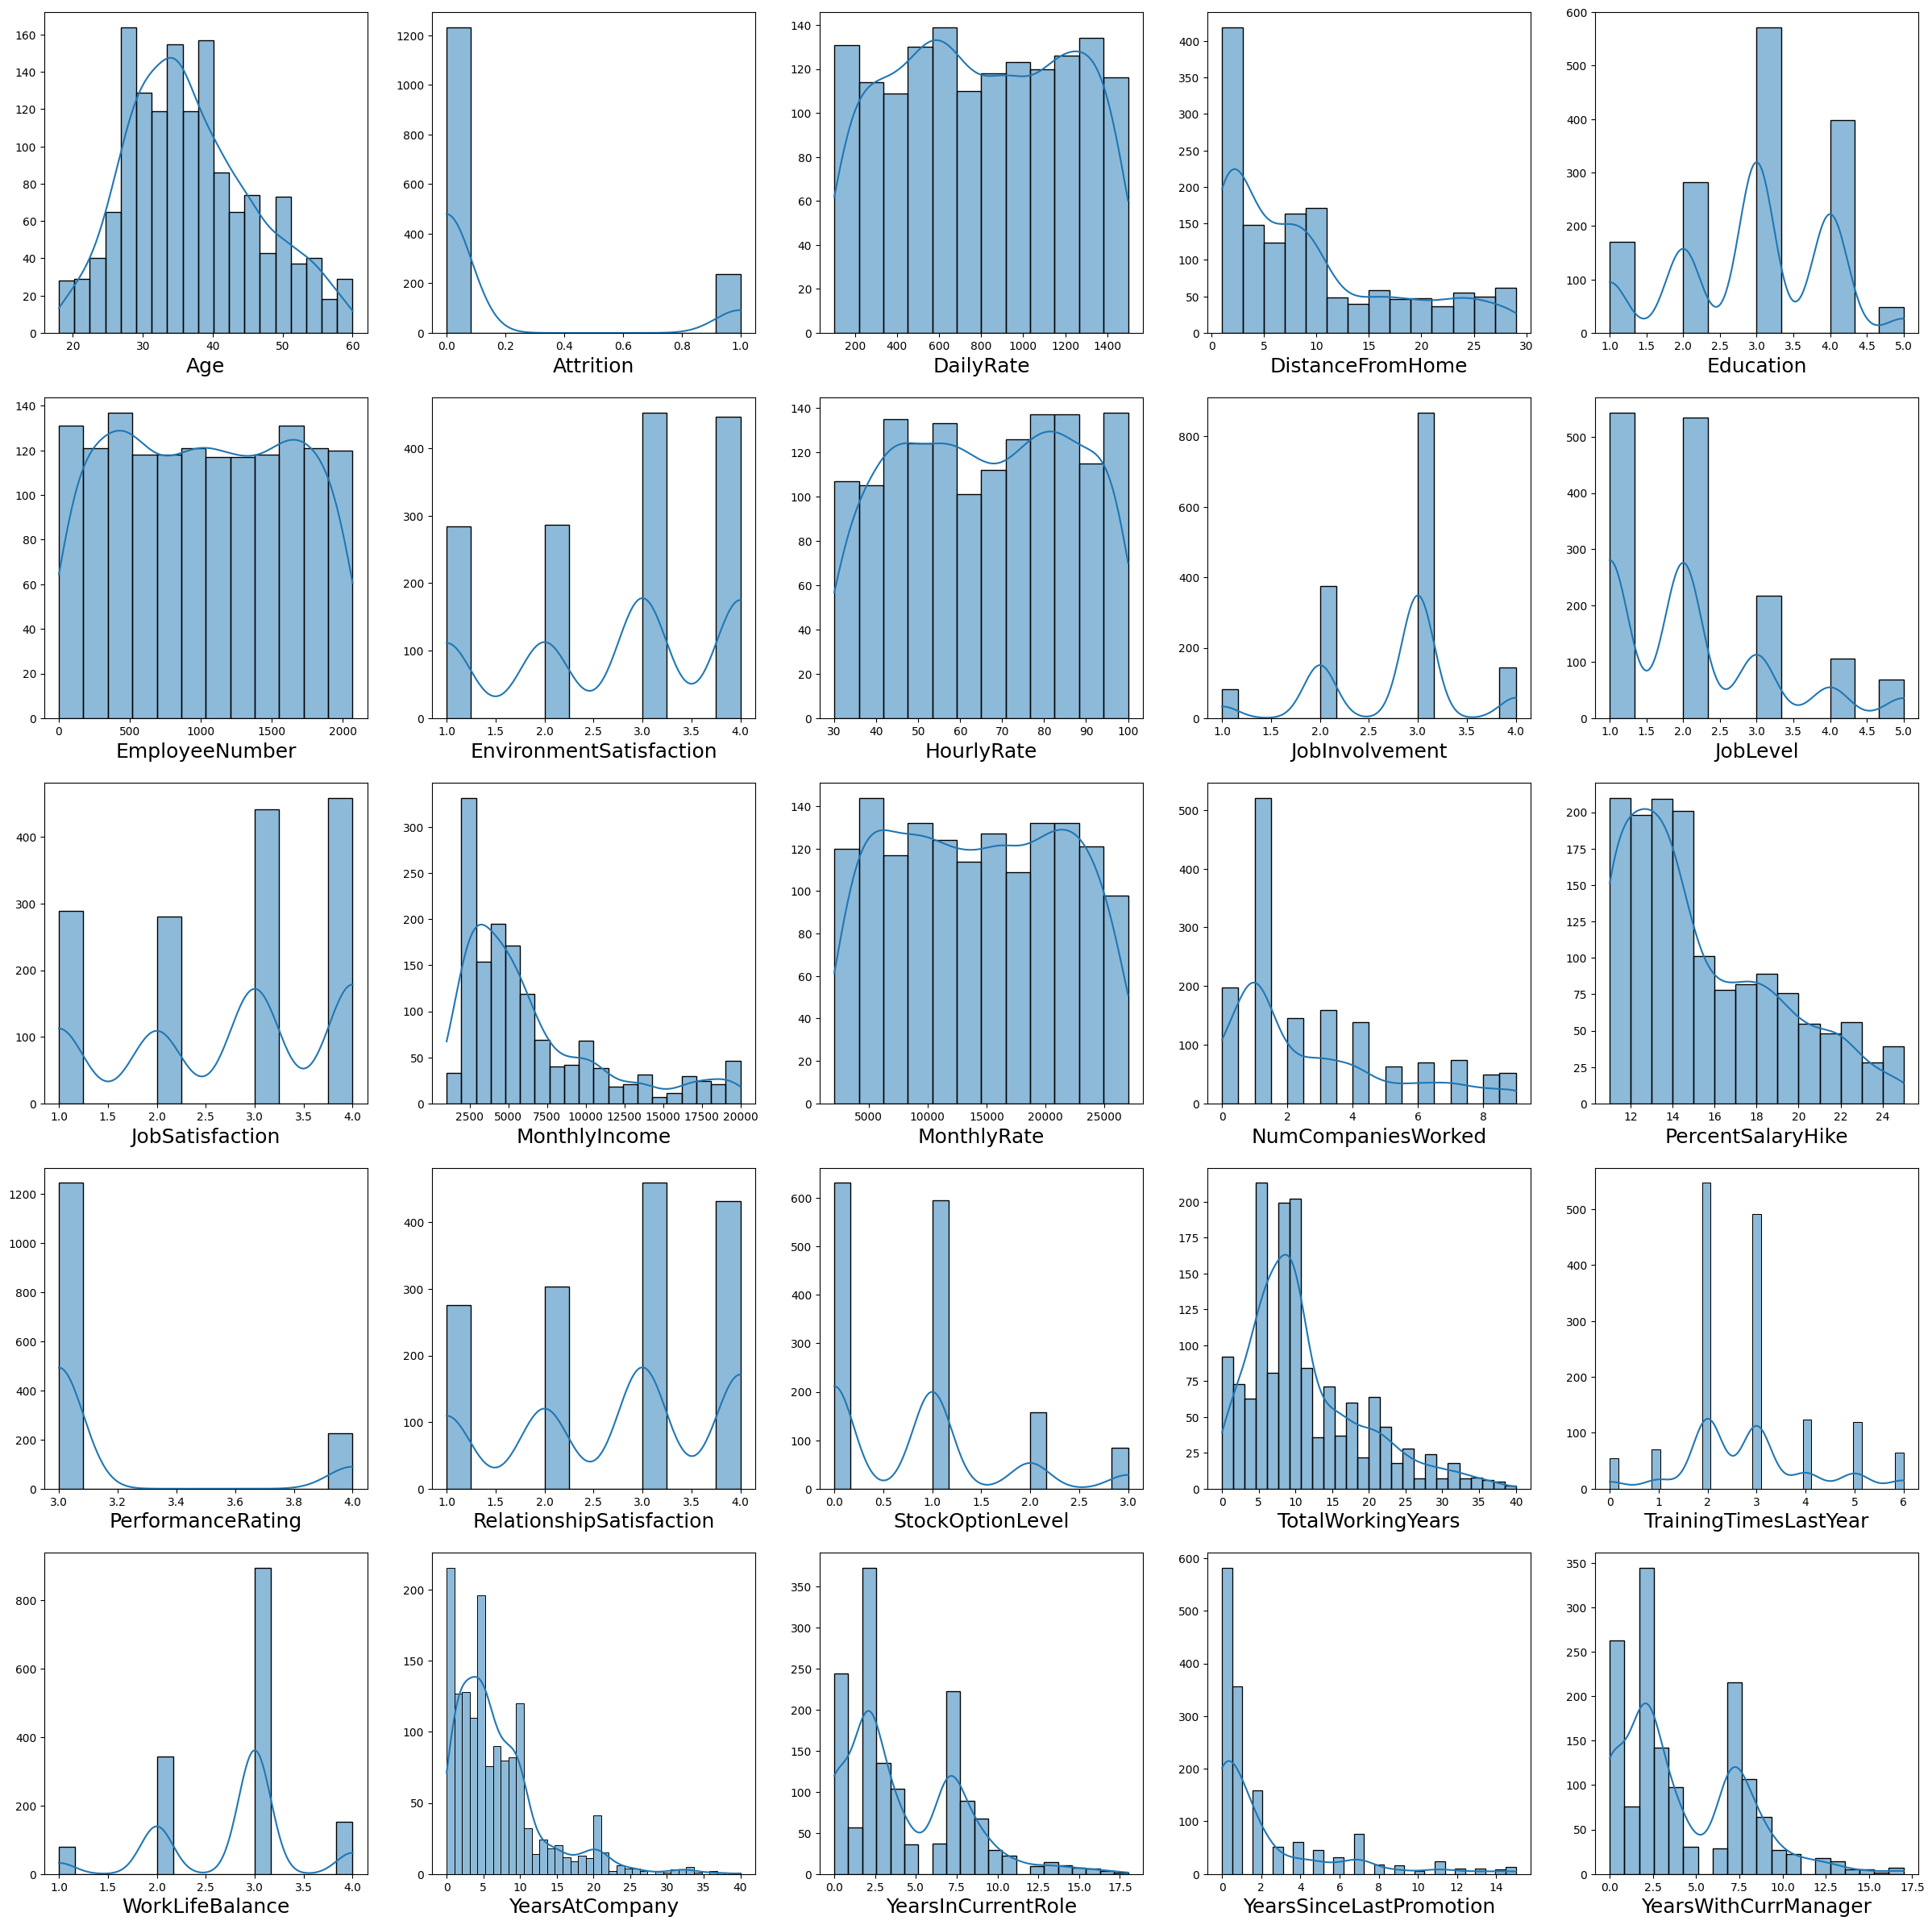

In [215]:
fig, axs = plt.subplots(5, 5, figsize=(30, 30))
k = 0
for i in range(5):
    for j in range(5):
        sns.histplot(data=df, x=df.describe().columns.tolist()[k], kde=True, ax=axs[i,j])
        axs[i,j].set_ylabel('')
        axs[i,j].set_xlabel(df.describe().columns.tolist()[k], size = 18 )
        k += 1


- Некоторые признаки имеют распределение с «тяжелыми хвостами» с перекосом вправо. Например, Месячный доход (MonthlyIncome), Расстояние от дома (DistanceFromHome), Кол-во лет в компании (YearsAtCompany). Возможно потребуются методы преобразование данных для приведения распределения к нормальному перед тренировкой модели.

- Распределения Возраста сотрудников нормальное с небольшим перекосом вправо. Основная масса персонала от 25 до 40 лет

- ИД сотрудника (Employee Number) это уникальный номер сотрудника из-за чего он получил псевдоравномерное распределение, никакой информации для нас он не несет, можно не включать его в наше признаковое пространство для обучения модели

Из полученных распределений интересно обратить внимание на показатель **DailyRate** - распредлен равномерно, то есть работодатели анализируемой компании страются равномерно распределять дневную ставку оплаты труда среди всех сотрудников, тоже самое можно сказать и про почасовую оплату труда **HourlyRate**, и про месячную оплату труду **MonthlyRate**. Такое распределение можно объяснить **искусственной** природой данных.

### Распределение признаков относительно целевой переменной

Интереснее было бы посмотреть, как отличаются между собой группы, относительно нашей целевой переменной

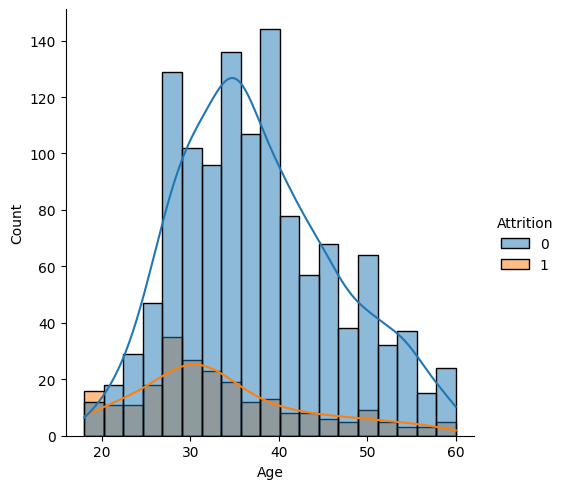

In [216]:
sns.displot(data=df, x='Age', kind='hist', kde=True, hue='Attrition')

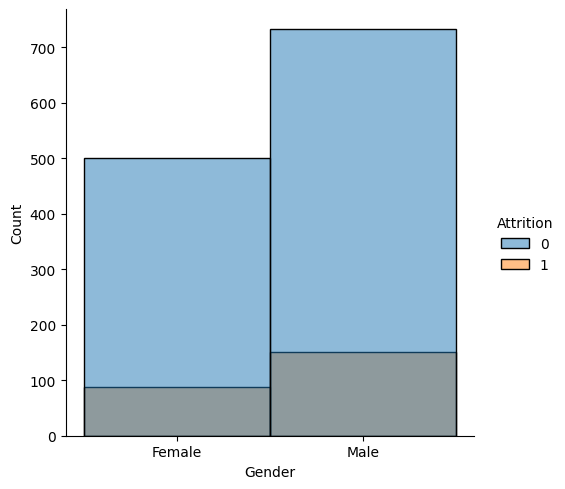

In [217]:
sns.displot(data=df, x='Gender', kind='hist', hue='Attrition')

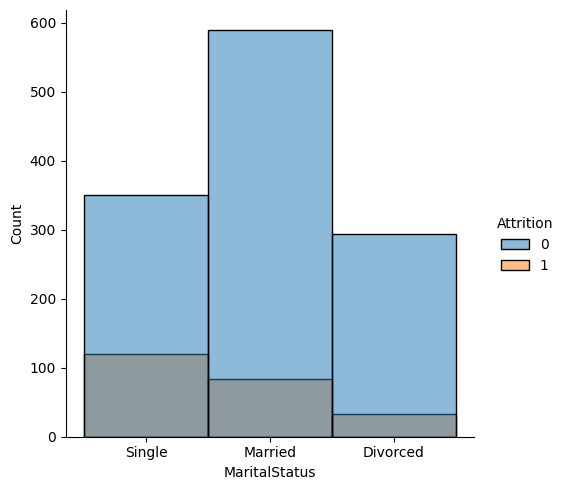

In [218]:
sns.displot(data=df, x='MaritalStatus', kind='hist', hue='Attrition')

Как видно из этих 2 графиков, данный вид визуализации дает нам намного больше полезной информации, например из графиков видно :

- Сотрудники с **меньшим возрастом** более склонны к смене работы

- Холостые сотрудники более часто меняют место работы, нежели женатые и разведенные, связать это можно с обязанностями обеспечивать семью или же с оседлым образом жизни

Построим распределение остальных признаков

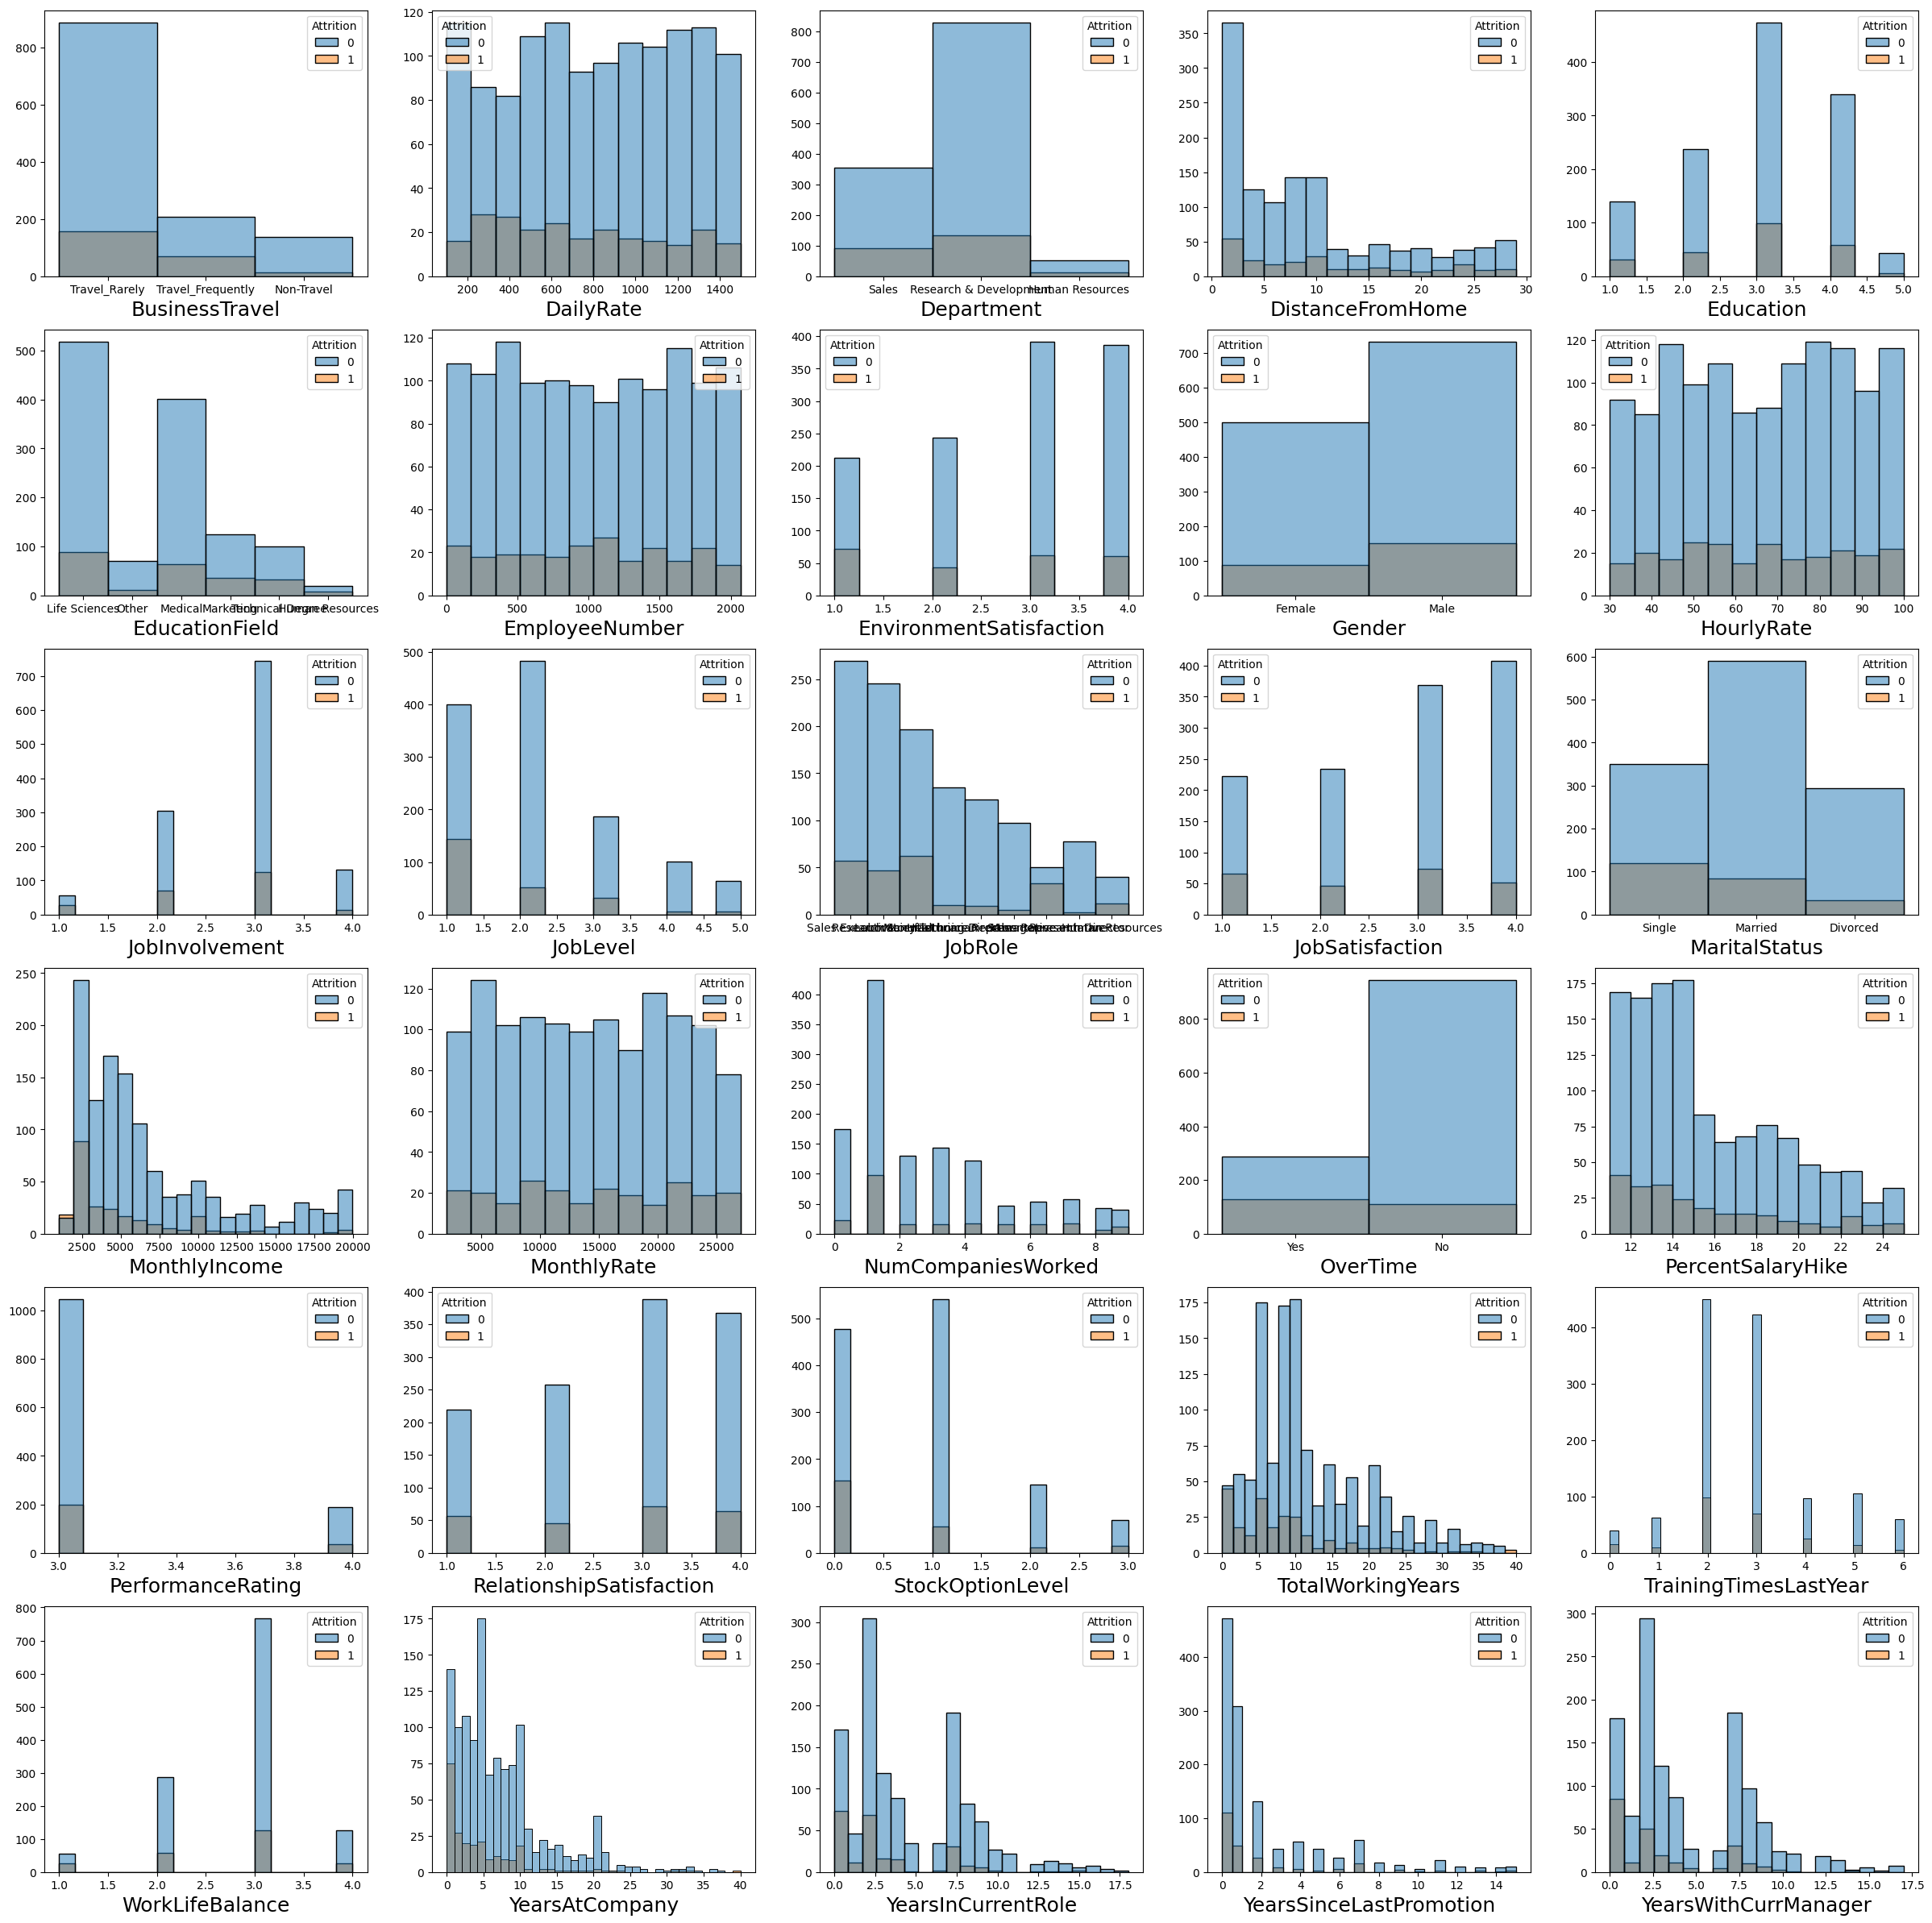

In [219]:
fig, axs = plt.subplots(6, 5, figsize=(30, 30))
k = 0
for i in range(6):
    for j in range(5):
        sns.histplot(data=df, x=df.drop(columns=['Attrition', 'Age']).columns.tolist()[k], ax=axs[i,j], hue=df.Attrition)
        axs[i,j].set_ylabel('')
        axs[i,j].set_xlabel(df.drop(columns=['Attrition', 'Age']).columns.tolist()[k], size = 18 )
        k += 1

### Выводы по анализу

- Видно существенную взаимосвязь между **частотой командировок (BusinessTravel**) и относительной долей **оттока** среди этих сотрудников, чем чаще командировки, тем выше отток
- При самой низкой **удовлетворенности обстановкой** (**EnvironmentSatisfaction**) отток выше, чем в осталных случаях. Такая же ситуация с **вовлеченностью** в работу
- Существует тенденция оттока **низкоквалифицированных специалистов** (**JobLevel**)
- Доля оттока у сотрудников с месячным доходом < 3000 значительно выше, также прослеживается большое значение при месячном доходе примерно 10000 (возможно существует корпоративная граница дохода, которую тяжело преодолеть)
- У некоторых сотрудников есть **сверхурочная работа** (**OverTime**). Данные ясно показывают, что среди перерабатывающих сотрудников доля уволившихся значительно выше.
- **Удовлетворение отношением внутри коллектива** влияет на отток, хоть и не так сильно
- Сильное влияние прослеживается с **общим трудовым стажем** (**TotalWorkingYears**), при значениях 0 - 3 года очень большой относительный отток. Такая же ситуация происходит со всеми признаками, связанными с рабочим стажем или проведенным временем внутри компании

## Целевая переменная

In [220]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Признак **Attrition** «Усталость» - это то, что мы пытаемся предсказать в этой задаче машинного обучения, используя другие связанные признаки из персональных данных сотрудника и его профессиональных данных. В датасете **83,9%** работающих сотрудников и **16,1%** бывших сотрудников. Следовательно, мы имеем дело с проблемой **несбалансированного класса**

Необходимо будет учесть это при выборе целевой метрики классификации, так как в таком случае обычный **Accuracy score** будет плохим выбором, т.к если алгоритм все значения отнесет к классу “0” значение Accuracy будет равной 0.84, что является неплохим результатом, хотя алгоритм по сути бесполезный.

Также несбалансированность классов нужно будет учитывать, проводя кросс-валидацию. В нашем случае будет необходима **стратифицированная кросс-валидация**, так как в противном случае в обучающей выборке может быть слишком мало данных с положительной целевой меткой.

## Выбор метрики оценки классификации

Так как целевой класс несбалансирован, более рациональным выбором будет следующие метрики: **F1 score** или **ROC-AUC**. Обе они подходят для несбалансированных классов и показывают примерно одинаковые результаты. Мой выбор пал на метрику **ROC-AUC**

Площадь под кривой **ROC** (**Area under ROC Curve**, **AUC**) это метрика производительности для задач бинарной классификации. Значение площади равное **1,0 соответствует идеальной модели**. Значение площади **0,5 соответствует случайной модели.**

## Препроцессинг данных

### Кодирование текстовых признаков

Так как модели машинного обучения на вход принимают только лишь числовые данных, а в нашем датасете присутствуют признаки, представленные строковым форматом, необходимо перевести их в числовой формат.

Для этой задачи существует несколько решений, это обычный **LabelEncode** - простое кодирование “Признак 1” — 1 ; “Признак 2” — 2 и.т.д. Но его применение не очень эффективно, так как при его использовании возникают излишние связи в данных, в примере выше модель поймет это так, что “Признак 2” в 2 раза больше, чем “Признак 1”, хотя на самом деле они могут даже не отличаться.

Следующий метод, решающий проблему предыдущего, называет **OHE (One Hot Encoding).** Он создает дополнительные бинарные признаки (новые колонки)  принимающие значения 0 или 1. Новые взаимосвязи в данных при такой реализации не возникают, но из минисов можно отметить создание большого количества новых признаков (в случае если исходные признак представлен большим количеством вариантов), которые в основном принимают значение 0.

Также стоит отметить и другие методы кодирования, такие как **бинарное кодирование** (используется в случае слишком большого разреженного признакового простанства)  и **таргетное кодирование,** где каждый признак функционально связан с целевой меткой (реализуется в алгоритме CatBOOST)

Я принял решение использовать метод **OHE**, так как **LabelEncode** создаст дополнительные взаимосвязи между данными, а более сложные методы на мой взгляд излишние.

In [221]:
print(df.shape)
data = pd.get_dummies(df) #Применение OHE
print(data.shape)


(1470, 32)
(1470, 53)


Как видно, признаков стало много больше, все эти дополнительные признаки представлены бинарным видом, посмотрим же на них.

In [222]:
pd.DataFrame(df.BusinessTravel.head())

,BusinessTravel
0,Travel_Rarely
1,Travel_Frequently
2,Travel_Rarely
3,Travel_Frequently
4,Travel_Rarely


In [223]:
pd.get_dummies(df.BusinessTravel).head()

,Non-Travel,Travel_Frequently,Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


Также остается открытым вопрос о том, нужно ли с помощью **OHE** кодировать числовые признаки, которые в исходных данных уже представлены закодированным видом ( с помощью LabelEncoder). Расшифровка этих признаков представлена не для всех данных, поэтому после реализации нтерпретируемость результатов упадет, но если качество модели увеличится, можно пожертвовать интерпретируемостью. Проверим эту гипотезу при реализации модели.

> Необходимость применять **OHE** к закодированным числовым признакам, таким как “Education” , “EnvironmentSatisfaction” и др. ? Также не забываем про **сильную корреляцию** “JobLevel” и “MonthlyIncome”, что может ухудшить эффективность линейных моделей.
>

### Нормализация числовых признаков

Стандартизация является методом приведения распределения числовых признаков к среднему вокруг нуля и единичной дисперсией. Например, многие элементы, используемые в целевой функции алгоритма обучения (такие как ядро RBF машин **опорных векторов** или регуляризаторы **l1 и l2 линейных моделей**), предполагают, что все функции сосредоточены **вокруг нуля** и имеют дисперсию в том же порядке.

Так как я собираюсь обучать также линейные модели, нормализуем наши числовые признаки

In [224]:
from sklearn.preprocessing import StandardScaler

num = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaller = StandardScaler()

data[num] = pd.DataFrame(scaller.fit_transform(data[num]), columns=num)

In [225]:
data[['Age', 'DistanceFromHome']].describe()

,Age,DistanceFromHome
count,1.470000e+03,1.470000e+03
mean,-3.504377e-17,4.350262e-17
std,1.000340e+00,1.000340e+00
min,-2.072192e+00,-1.010909e+00
25%,-7.581700e-01,-8.875151e-01
50%,-1.011589e-01,-2.705440e-01
75%,6.653541e-01,5.932157e-01
max,2.526886e+00,2.444129e+00


## Выбор моделей машинного обучения

Будет рассматривать как простые модели, так и сложные, вдруг простые покажут лучший результат

Рассматриваем модели:

### • Логистическая регрессия (**Logistic Regression**)

### • Метод k-ближайших соседей (**KNN**)

### • Случайный лес (**Random Forest**)

### • Градиентный бустинг над решающими деревьями (XGBoostClassifier)

## Разбивка на тестовую и обучающую выборку

Так как целевая переменная несбалансирована, будем использовать стратифицированную разбивку по таргету. Размер тестовой выборки определим как **33** % от исходной.

In [226]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=17,
                                                    stratify=y)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (984, 52)
Number transactions y_train dataset:  (984,)
Number transactions X_test dataset:  (486, 52)
Number transactions y_test dataset:  (486,)


## Приближенная оценка моделей

Проведем первоначальное приближение моделей с рандомизированным побором гиперпараметров на кросс-валидации по 10 фолдам с помощью **RandomizedSearchCV**, в качестве гиперпараметров для модели будем использовать только основные. Под капотом у **RandomizedSearchCV** стратифицированная валидация, что хорошо (вспоминаем про несбалансированность классов).

In [229]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

C:\Users\Renat\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'ROC-AUC score')

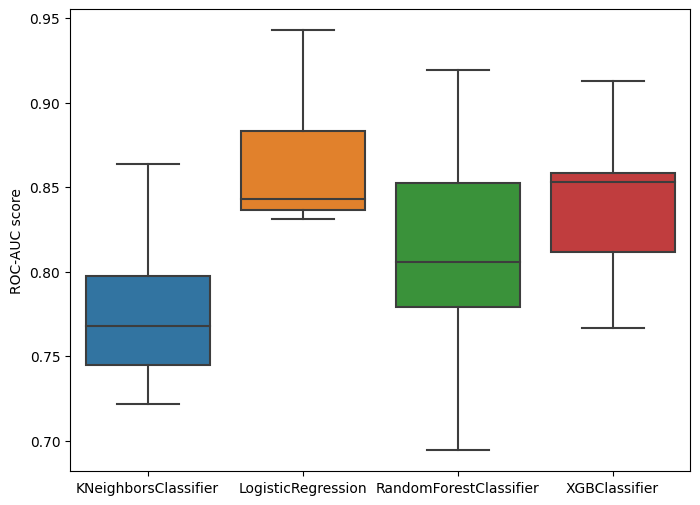

In [230]:
param_grid_for_KNN = { "n_neighbors": np.arange(1, 100, 2)}
RSCV_KNN = RandomizedSearchCV(KNeighborsClassifier(), scoring='roc_auc', param_distributions=param_grid_for_KNN, cv=10, random_state=17, n_jobs=-1)
RSCV_KNN.fit(X_train, y_train)
knn_results = []
for i in range(10):
    knn_results.append(RSCV_KNN.cv_results_[f'split{i}_test_score'][RSCV_KNN.best_index_])

param_grid_for_LogReg = { "C": np.arange(1e-03, 2, 0.01)}
RSCV_LogReg = RandomizedSearchCV(LogisticRegression(random_state=17), scoring='roc_auc', param_distributions=param_grid_for_LogReg, cv=10, random_state=17, n_jobs=-1)
RSCV_LogReg.fit(X_train, y_train)
LogReg_results = []
for i in range(10):
    LogReg_results.append(RSCV_LogReg.cv_results_[f'split{i}_test_score'][RSCV_LogReg.best_index_])

param_grid_for_forest = { "n_estimators": np.arange(10, 300, 2),
                          "max_depth": np.arange(1, 20, 1),
                          "min_samples_split": np.arange(2,150,1),
                          "min_samples_leaf": np.arange(2,60,1),
                          "max_features" : np.arange(1,X_train.shape[1],1)}
RSCV_RF = RandomizedSearchCV(RandomForestClassifier(random_state=17), scoring='roc_auc', param_distributions=param_grid_for_forest, cv=10, random_state=17, n_jobs=-1)
RSCV_RF.fit(X_train, y_train)
RF_results = []
for i in range(10):
    RF_results.append(RSCV_RF.cv_results_[f'split{i}_test_score'][RSCV_RF.best_index_])

param_grid_for_xgb = {"n_estimators": np.arange(10, 300, 2),
                      "max_depth": np.arange(1,20,1),
                      "subsample" : [i/10.0 for i in range(1,10)],
                      'colsample_bytree':[i/10.0 for i in range(1,10)],
                      'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100]    ,
                      'gamma' : [i/10.0 for i in range(1,10)]}
RSCV_XGB = RandomizedSearchCV(XGBClassifier(random_state=17), scoring='roc_auc', param_distributions=param_grid_for_xgb, cv=10, random_state=17, n_jobs=-1)
RSCV_XGB.fit(X_train, y_train)
XGB_results = []
for i in range(10):
    XGB_results.append(RSCV_XGB.cv_results_[f'split{i}_test_score'][RSCV_XGB.best_index_])

results = [knn_results, LogReg_results, RF_results, XGB_results]
columns = ['KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'XGBClassifier']
df_resultsCV = pd.DataFrame(results).T.rename(columns={0:columns[0], 1:columns[1], 2:columns[2], 3:columns[3]})
df_resultsCV.describe().iloc[[1, 5], :].rename(index={'50%':'median'})


fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(df_resultsCV, ax=ax)
ax.set_ylabel('ROC-AUC score')

In [231]:
df_resultsCV.describe().iloc[[1, 5], :].rename(index={'50%':'median'})

,KNeighborsClassifier,LogisticRegression,RandomForestClassifier,XGBClassifier
mean,0.780019,0.863528,0.809776,0.842180
median,0.767721,0.843208,0.805705,0.853016


### Выводы

Как видно из таблицы и графика box-plot лучшие результаты показала **логистическая регрессия** и **градиентный бустинг**, что еще раз говорит нам о том, что простые модели также могут показывать хорошие результаты

Дальше будем работать с этими 2 моделями, попробуем потюнить **гиперпараметры**, поизменять **признаковое пространство,** а также построим **кривые валидации и обучения**

## Работа с признаковым пространством

### Оценка влияния коррелирующих признаков

Как говорилось ранее, в нашем признаковом пространстве существуют 2 признака с очень сильной корреляцией, это MonthlyIncome и JobLevel

In [232]:
X_train[['MonthlyIncome', 'JobLevel']].corr()

,MonthlyIncome,JobLevel
MonthlyIncome,1.000000,0.949303
JobLevel,0.949303,1.000000


<AxesSubplot: xlabel='JobLevel', ylabel='MonthlyIncome'>

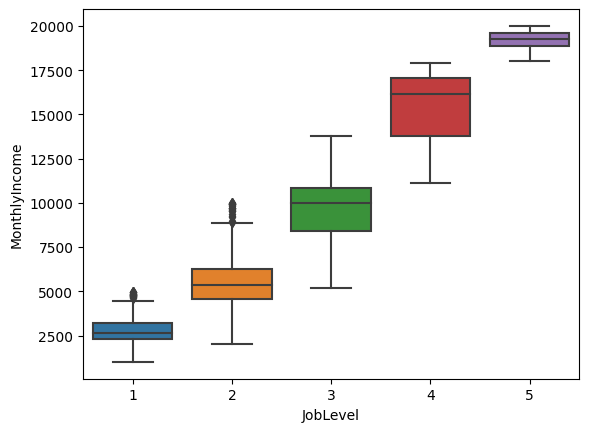

In [233]:
sns.boxplot(data=df, y='MonthlyIncome', x='JobLevel')

Попробуем удалить 1 из этих признаков и посмотрим, как изменится результат.  Удалим MonthlyIncome

In [234]:
def LogReg_XGB_CV_score(X_train_1, X_train_2, y_train, param_grid_for_LogReg, param_grid_for_xgb, column_names, score=True, plot=True, random_state = 17):
    """ 
    Эта функция позволяет сравнивать модели между собой в зависимости от признакового пространства, на котором модели обучаются, 
    по которым идет рандомизированная кросс-валидация по 10 фолдам. 
    Функция строит 4 боксплота, печатает ROC-AUC скор лучшей модели и возвращает датафрейм с результатами кросс-валидаций
    """
    RSCV_LogReg = RandomizedSearchCV(LogisticRegression(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_for_LogReg, cv=10, random_state=random_state, n_jobs=-1)
    RSCV_LogReg.fit(X_train_1, y_train)
    LogReg_results = []
    for i in range(10):
        LogReg_results.append(RSCV_LogReg.cv_results_[f'split{i}_test_score'][RSCV_LogReg.best_index_])

    RSCV_XGB = RandomizedSearchCV(XGBClassifier(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_for_xgb, cv=10, random_state=random_state, n_jobs=-1)
    RSCV_XGB.fit(X_train_1, y_train)
    XGB_results = []
    for i in range(10):
        XGB_results.append(RSCV_XGB.cv_results_[f'split{i}_test_score'][RSCV_XGB.best_index_])

    RSCV_LogReg2 = RandomizedSearchCV(LogisticRegression(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_for_LogReg, cv=10, random_state=random_state, n_jobs=-1)
    RSCV_LogReg2.fit(X_train_2, y_train)
    LogReg_results2 = []
    for i in range(10):
        LogReg_results2.append(RSCV_LogReg2.cv_results_[f'split{i}_test_score'][RSCV_LogReg2.best_index_])

    RSCV_XGB2 = RandomizedSearchCV(XGBClassifier(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_for_xgb, cv=10, random_state=random_state, n_jobs=-1)
    RSCV_XGB2.fit(X_train_2, y_train)
    XGB_results2 = []
    for i in range(10):
        XGB_results2.append(RSCV_XGB2.cv_results_[f'split{i}_test_score'][RSCV_XGB2.best_index_])
    results = [LogReg_results, LogReg_results2, XGB_results, XGB_results2]
    df_resultsCV = pd.DataFrame(results).T.rename(columns={0:column_names[0], 1:column_names[1], 2:column_names[2], 3:column_names[3]})
    df_resultsCV.describe().iloc[[1, 5], :].rename(index={'50%':'median'})
    if score:
        print(f'ROC-AUC score модели {column_names[0]} равен {round(RSCV_LogReg.best_score_, 5)}')
        print(f'ROC-AUC score модели {column_names[1]} равен {round(RSCV_LogReg2.best_score_, 5)}')
        print(f'ROC-AUC score модели {column_names[2]} равен {round(RSCV_XGB.best_score_, 5)}')
        print(f'ROC-AUC score модели {column_names[3]} равен {round(RSCV_XGB2.best_score_, 5)}')
    if plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(df_resultsCV, ax=ax)
        ax.set_ylabel('ROC-AUC score')
    return df_resultsCV

In [235]:
param_grid_for_LogReg = { "C": np.arange(1e-03, 2, 0.01)}

param_grid_for_xgb = {"n_estimators": np.arange(10, 300, 2),
                      "max_depth": np.arange(1,20,1),
                      "subsample" : [i/10.0 for i in range(1,10)],
                      'colsample_bytree':[i/10.0 for i in range(1,10)],
                      'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100]    ,
                      'gamma' : [i/10.0 for i in range(1,10)]}

C:\Users\Renat\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Renat\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

ROC-AUC score модели LogReg_with_MI равен 0.86353
ROC-AUC score модели LogReg_without_MI равен 0.86454
ROC-AUC score модели XGB_with_MI равен 0.84218
ROC-AUC score модели XGB_without_MI равен 0.83332


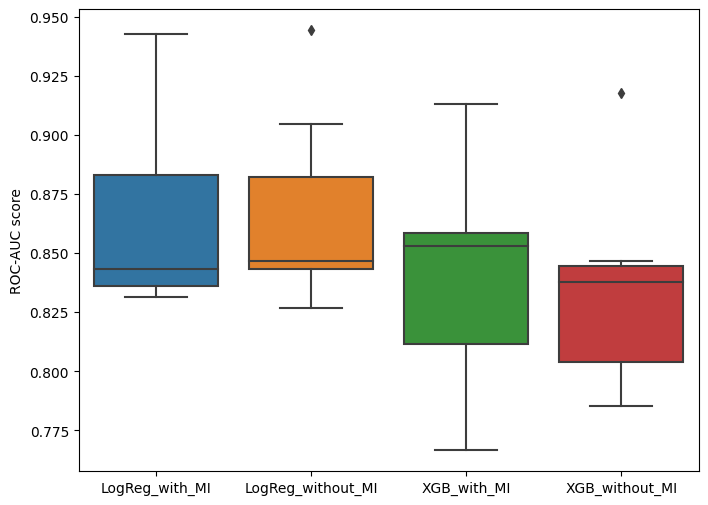

In [236]:
column_names = ['LogReg_with_MI', 'LogReg_without_MI', 'XGB_with_MI', 'XGB_without_MI']
X_train_without_MI = X_train.drop('MonthlyIncome', axis=1)
LogReg_XGB_CV_score(X_train_1=X_train, X_train_2=X_train_without_MI, y_train=y_train, param_grid_for_LogReg=param_grid_for_LogReg, 
                       param_grid_for_xgb=param_grid_for_xgb, column_names=column_names);

Как видно результаты прогнозов моделей практически не изменились, видна небольшая разница в модели градиентного бустинга, средний скор различается на 1 сотую. Это может быть как следствием случайного отклонения, либо же деревья бустинга разбивали подвыборки именно по этому признаку, и так как мы его убрали, скор уменьшился. Следовательно, оставляет этот признак.

### Применение OHE к псевдочисловым признакам

Псевдочисловыми признаками буду называть категориальные признаки, закодированные изначально с помощью обычного LabelEncoder. В нашем случае таких признаков довольно много, и возможно, применение OHE к этим признакам даст прирост качества моделей.

In [237]:
LabelEnc_col = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'] # Те самые псевдочисловые признаки
X_train_with_OHE = X_train.copy()
for i in LabelEnc_col:
    X_train_with_OHE[i] = X_train_with_OHE[i].map({1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'}) #OHE работает со строками
X_train_with_OHE = pd.get_dummies(X_train_with_OHE)

C:\Users\Renat\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC score модели LogReg равен 0.86353
ROC-AUC score модели LogReg_with_OHE равен 0.88116
ROC-AUC score модели XGB равен 0.84218
ROC-AUC score модели XGB_with_OHE равен 0.83873


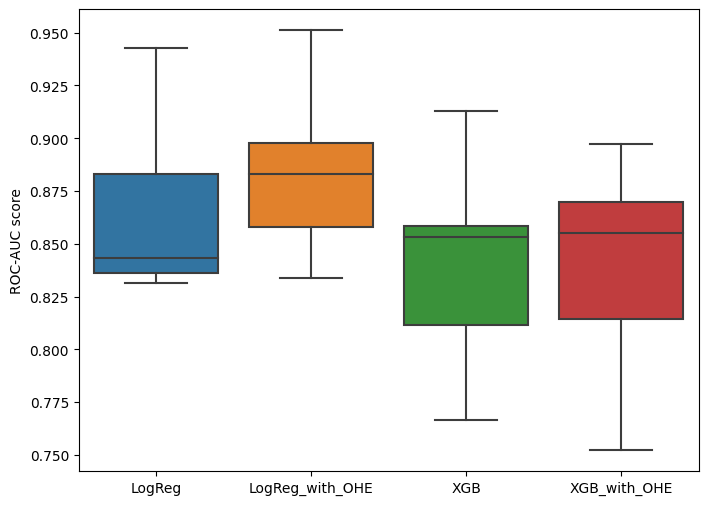

In [238]:
column_names = ['LogReg', 'LogReg_with_OHE', 'XGB', 'XGB_with_OHE']
LogReg_XGB_CV_score(X_train_1=X_train, X_train_2=X_train_with_OHE, y_train=y_train, param_grid_for_LogReg=param_grid_for_LogReg, 
                       param_grid_for_xgb=param_grid_for_xgb, column_names=column_names);

Видно значительное улучшение модели логистической регрессии, у бустинга же различия в пределах случайных отклонений. Обьяснить это можно тем, что признаков стало уже довольно много, а логистическая регрессия как раз умеет хорошо работать с такими (разреженными) данными. Решающие деревья же не могут также вычленить закономерности в данных, как это делает регрессия. Оставим эти изменения для дальнейшей работы.

## Оценка важности признаков

### Логистическая регрессия

Оценим топ 5 признаков, которые положительно и отрицательно коррелируют с целевой переменной, сделаем это с помощью коэффициентов модели каждого признака

In [239]:
X_train = X_train_with_OHE.copy()

In [240]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
# get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * n_top_features), feature_names[interesting_coefficients], rotation=75, ha="right");

In [241]:
random_state = 17
cv = 10
RSCV_LogReg = RandomizedSearchCV(LogisticRegression(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_for_LogReg, cv=cv, random_state=random_state, n_jobs=-1)
RSCV_LogReg.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=17),
                   n_jobs=-1,
                   param_distributions={'C': array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-...
       1.681e+00, 1.691e+00, 1.701e+00, 1.711e+00, 1.721e+00, 1.731e+00,
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00])},
                   random_state=17, scoring='roc_auc')

In [242]:
logit = RSCV_LogReg.best_estimator_

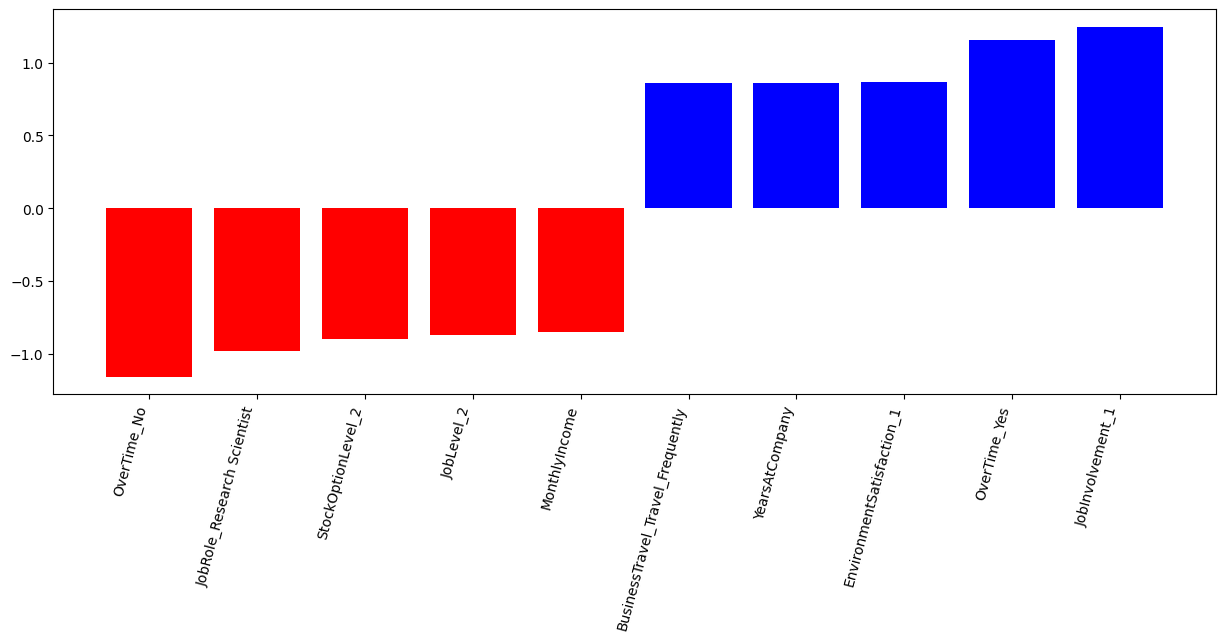

In [243]:
visualize_coefficients(logit, X_train.columns, n_top_features=5)

Как видно из этого графика, наиболее сильно на отток сотрудников влияет низкая вовлеченность в работу и наличие переработок. Благоприятными же для сотрудников являются следующие факторы: отсутствие переработок, наличие акций компании, и, неожиданно, должность научного сотрудника, занимающегося исследовательской работой

### Бустинг

Посмотрим на самые значимые признаки для модели бустинга. Он показывает зачимость признака, вне зависимости от влияния на таргет (положительно/отрицательно)

In [244]:
RSCV_XGB = RandomizedSearchCV(XGBClassifier(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_for_xgb, cv=cv, random_state=random_state, n_jobs=-1, verbose = 1)
RSCV_XGB.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
       192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216,
       218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242,
       244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268,
       270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294,
       296, 298]),
                                        'reg_alpha': [0, 1e-05, 0.01, 0.1, 1,
                                                      100],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9]},
                   random_state=17, scoring='roc_auc', verbose=1)

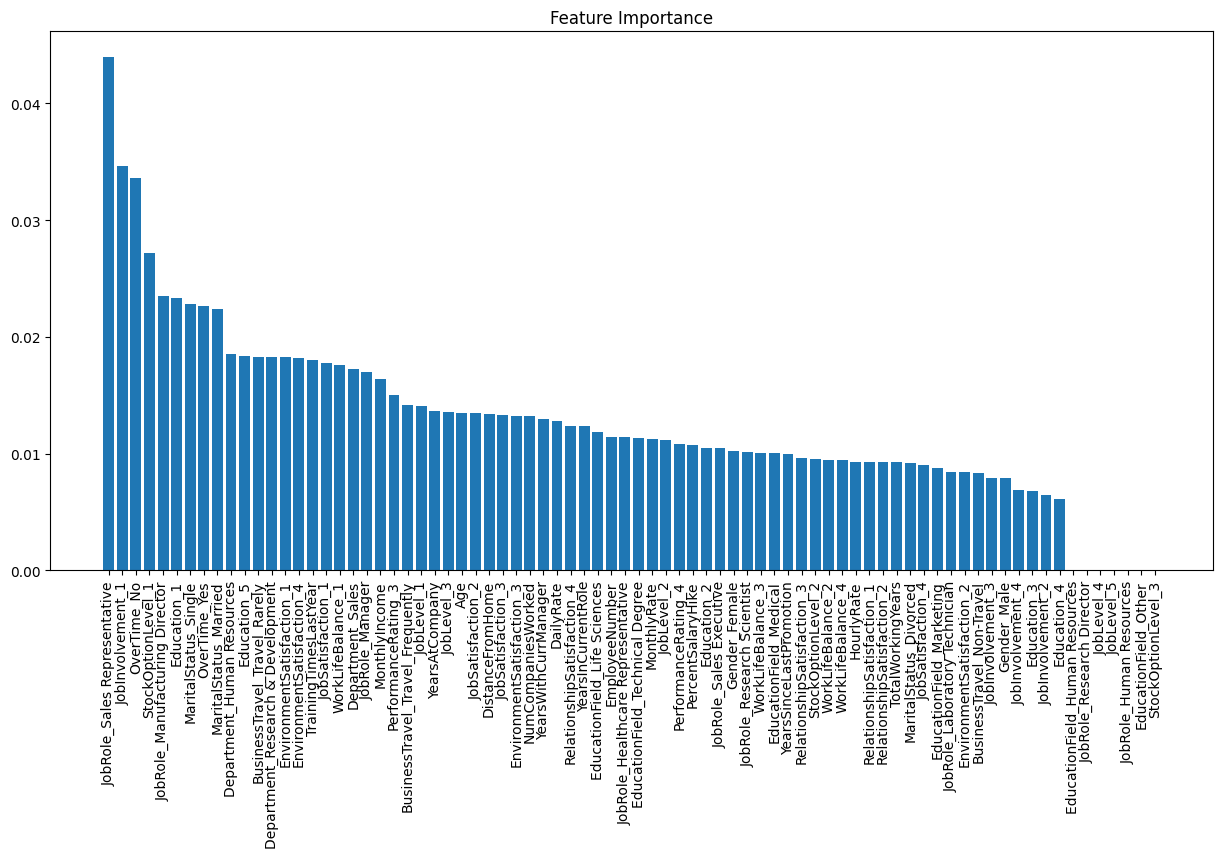

In [312]:
importances = RSCV_XGB.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

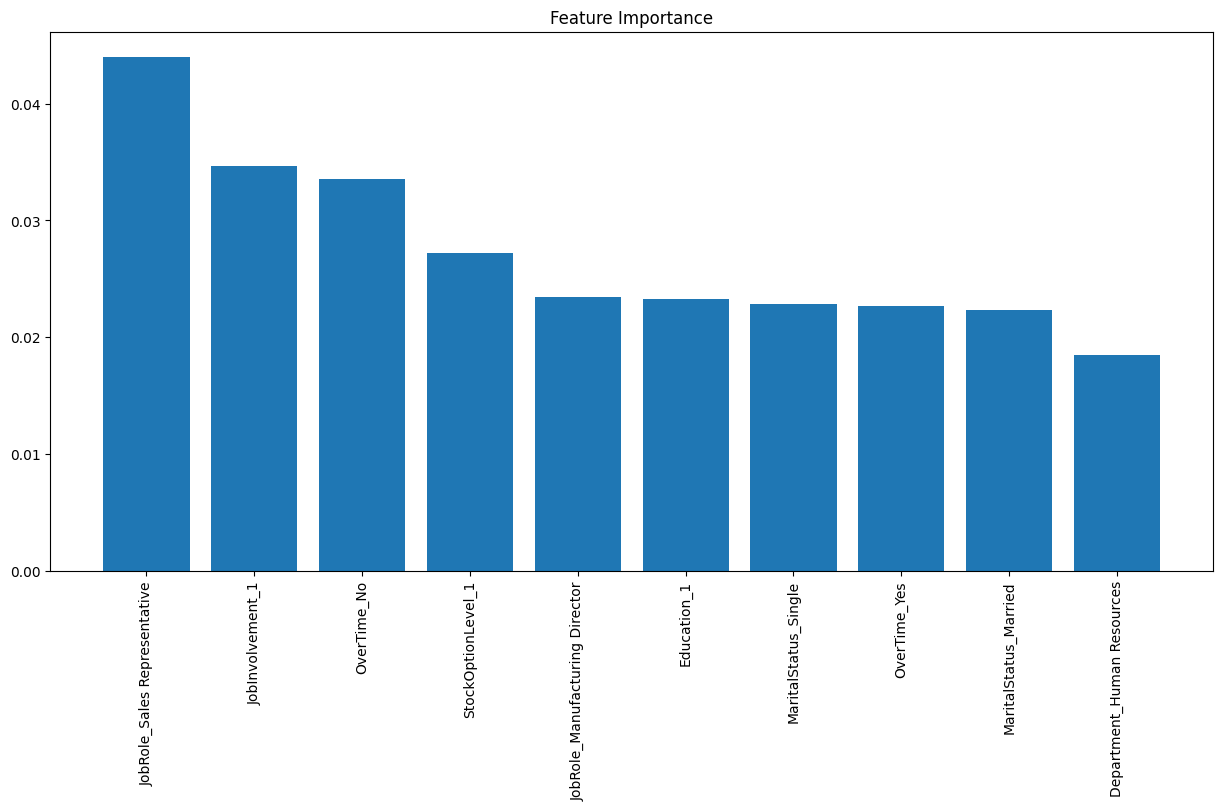

In [313]:
n = 10
importances = RSCV_XGB.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1][:n]
names = [X_train.columns[i] for i in indices]
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(n), importances[indices])
plt.xticks(range(n), names, rotation=90)
plt.show()

## Точный подбор гиперпараметров

С помощью GridSearchCV точно подберем значения гиперпараметров для каждой модели.  Но для начала, раз линейные модели показывают такую хорошую точность, попробуем применить бустинг не на деревьях, а на линейных моделях.

In [254]:
def compare_param(X_train, y_train, param_grid_1, param_grid_2, column_names, model='xgb', score=True, plot=True, random_state = 17):
    if model == 'xgb':

        model_1 = RandomizedSearchCV(XGBClassifier(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_1, cv=10, random_state=random_state, n_jobs=-1)
        model_1.fit(X_train, y_train)
        model_1_res = []
        for i in range(10):
            model_1_res.append(model_1.cv_results_[f'split{i}_test_score'][model_1.best_index_])

        model_2 = RandomizedSearchCV(XGBClassifier(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_2, cv=10, random_state=random_state, n_jobs=-1)
        model_2.fit(X_train, y_train)
        model_2_res = []
        for i in range(10):
            model_2_res.append(model_2.cv_results_[f'split{i}_test_score'][model_2.best_index_])

    if model == 'logreg':

        model_1 = RandomizedSearchCV(XGBClassifier(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_1, cv=10, random_state=random_state, n_jobs=-1)
        model_1.fit(X_train, y_train)
        model_1_res = []
        for i in range(10):
            model_1_res.append(model_1.cv_results_[f'split{i}_test_score'][model_1.best_index_])

        model_2 = RandomizedSearchCV(XGBClassifier(random_state=random_state), scoring='roc_auc', param_distributions=param_grid_2, cv=10, random_state=random_state, n_jobs=-1)
        model_2.fit(X_train, y_train)
        model_2_res = []
        for i in range(10):
            model_2_res.append(model_2.cv_results_[f'split{i}_test_score'][model_2.best_index_])

    res = [model_1_res, model_2_res]
    df_resultsCV = pd.DataFrame(res).T.rename(columns={0:column_names[0], 1:column_names[1]})
    df_resultsCV.describe().iloc[[1, 5], :].rename(index={'50%':'median'})

    if score:
        print(f'ROC-AUC score модели {column_names[0]} равен {round(model_1.best_score_, 5)}')
        print(f'ROC-AUC score модели {column_names[1]} равен {round(model_2.best_score_, 5)}')
            
    if plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(df_resultsCV, ax=ax)
        ax.set_ylabel('ROC-AUC score')

    return df_resultsCV
        

In [255]:
param_grid_1 = {"booster":['gbtree'],
                      "n_estimators": np.arange(10, 300, 2),
                      "max_depth": np.arange(1,20,1),
                      "subsample" : [i/10.0 for i in range(1,10)],
                      'colsample_bytree':[i/10.0 for i in range(1,10)],
                      'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100]    ,
                      'gamma' : [i/10.0 for i in range(1,10)]}

In [256]:
param_grid_2 = {"booster":['gblinear'],
                      "n_estimators": np.arange(10, 300, 2),
                      "max_depth": np.arange(1,20,1),
                      "subsample" : [i/10.0 for i in range(1,10)],
                      'colsample_bytree':[i/10.0 for i in range(1,10)],
                      'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100]    ,
                      'gamma' : [i/10.0 for i in range(1,10)]}

In [257]:
column_names = ['gbtree', 'gblinear']

[22:23:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "subsample" } are not used.

ROC-AUC score модели gbtree равен 0.83873
ROC-AUC score модели gblinear равен 0.8718


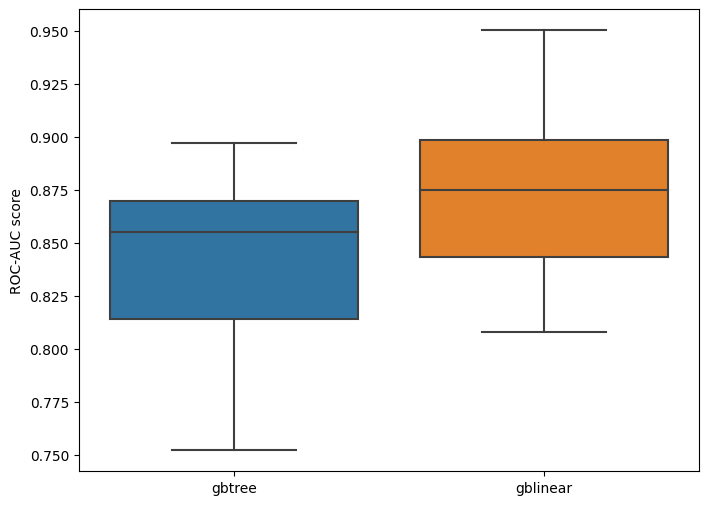

In [258]:
compare_param(X_train=X_train, y_train=y_train, param_grid_1=param_grid_1, param_grid_2=param_grid_2, column_names=column_names, model='xgb', plot=True, random_state=17);

Как видно, бустинг над линейными моделями сильно лучше, далее будем использовать его. Надор гиперпараметров для линейных моделей очень скудный, по сути это только параметр регуляризации. Также и для бустинга над линейными моделями регулируется в основном только регуляризация. Подберем параметры и посмотрим на результат

In [265]:
from sklearn.model_selection import GridSearchCV

In [267]:
param_grid = {"booster":['gblinear'],
              "reg_alpha":[0, 0.001]}

In [268]:
param_grid_for_XGB_lin = {"booster":['gblinear'],
              "reg_alpha":np.arange(0, 0.01, 0.001),
              "reg_lambda":np.arange(0, 0.01, 0.001)}

In [269]:
XGB_lin = GridSearchCV(estimator=XGBClassifier(random_state=17), scoring='roc_auc', param_grid=param_grid_for_XGB_lin, cv=10,  n_jobs=-1)
XGB_lin.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=17, ...),
             n_jobs=-1,
             param_grid={'booster': ['gblinear'],
                         'reg_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009]),
                         'reg_lambda': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])},
             scoring='roc_auc')

In [270]:
XGB_lin.best_score_

0.8860936428641395

In [271]:
XGB_lin.best_params_

{'booster': 'gblinear', 'reg_alpha': 0.002, 'reg_lambda': 0.002}

In [272]:
XGB_model = XGB_lin.best_estimator_

Как видно, для бустинга не потребовалась сильная регуляризация. До этого была произведена прикидка, которая показала, что оптимальные значения лежат в пределах 0,01

In [276]:
param_grid_for_LogReg = { "C": np.arange(1e-03, 2, 0.01)}

In [277]:
param_grid_for_LogReg = {"C": np.arange(0, 0.5, 0.001)}

In [278]:
LogReg = GridSearchCV(estimator=LogisticRegression(random_state=17), scoring='roc_auc', param_grid=param_grid_for_LogReg, cv=10,  n_jobs=-1)
LogReg.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=17), n_jobs=-1,
             param_grid={'C': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0...
       0.441, 0.442, 0.443, 0.444, 0.445, 0.446, 0.447, 0.448, 0.449,
       0.45 , 0.451, 0.452, 0.453, 0.454, 0.455, 0.456, 0.457, 0.458,
       0.459, 0.46 , 0.461, 0.462, 0.463, 0.464, 0.465, 0.466, 0.467,
       0.468, 0.469, 0.47 , 0.471, 0.472, 0.473, 0.474, 0.475, 0.476,
       0.477, 0.478, 0.479, 0.48 , 0.481, 0.482, 0.483, 0.484, 0.485,
       0.486, 0.487, 0.488, 0.489, 0.49 , 0.491, 0.492, 0.493, 0.494,
       0.495, 0.496, 0.497, 0.498, 0.499])},
             scoring='roc_auc')

In [279]:
LogReg.best_score_

0.8831969952982662

In [280]:
LogReg.best_params_

{'C': 0.261}

In [281]:
LogReg_model = LogReg.best_estimator_

Видно, что результаты  моделей отличаются в пределах погрешностей, поэтому можно использовать любую из них. Но конечный результат покажет прогноз на тестовой выборке

## Кривые валидации и обучения

Кривая валидации визуализирует настройку гиперпараметров, кривая обучения показывает достаточность данных, на которых обучается модель

### Кривые валидации

Модель - Бустинг

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished
C:\Users\Renat\AppData\Local\Temp\ipykernel_12100\4267405405.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  line = sns.lineplot(data=resdf, y='test_score', x='reg_alpha', ax=ax, ci=None)
C:\Users\Renat\AppData\Local\Temp\ipykernel_12100\4267405405.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  line2 = sns.lineplot(data=resdf, y='train_score', x='reg_alpha', ax=ax, ci=None)


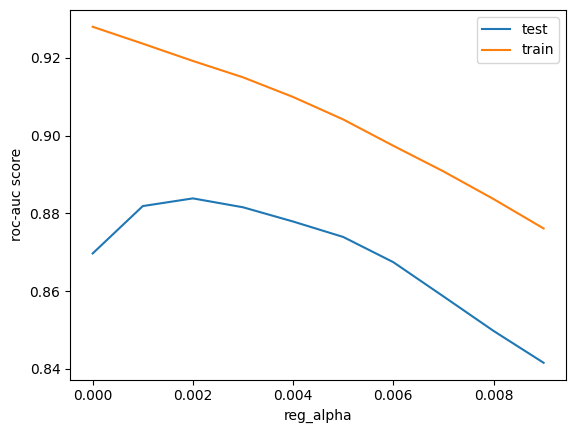

In [314]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
np.random.seed(17)

cv = StratifiedKFold(n_splits=5)
train_scores, valid_scores = validation_curve(estimator=XGBClassifier(booster='gblinear'), X=X_train, y=y_train, 
                                              param_name="reg_alpha", param_range=np.arange(0, 0.01, 0.001), 
                                              cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

arr1 = list(map(np.mean, valid_scores))
arr2 = list(map(np.mean, train_scores))
arr3 = list(np.arange(0, 0.01, 0.001))
resdf = pd.DataFrame([arr1, arr2, arr3]).T.rename(columns={0:'test_score', 1:'train_score', 2:'reg_alpha'})

fig, ax = plt.subplots()
line = sns.lineplot(data=resdf, y='test_score', x='reg_alpha', ax=ax, ci=None)
line2 = sns.lineplot(data=resdf, y='train_score', x='reg_alpha', ax=ax, ci=None)
ax.set_ylabel('roc-auc score')
ax.legend(['test', 'train'])

Результат получился ожидаемый, наилучший результат модель показала при таком же значении гиперпераметра, что и при подборе по сетке. Вывод: гиперпараметры подобраны правильно, оставляем модель с параметрами из gridsearchcv

Модель - Логистическая регрессия

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.7s finished
C:\Users\Renat\AppData\Local\Temp\ipykernel_12100\906732178.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  line = sns.lineplot(data=resdf, y='test_score', x='C', ax=ax, ci=None)
C:\Users\Renat\AppData\Local\Temp\ipykernel_12100\906732178.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  line2 = sns.lineplot(data=resdf, y='train_score', x='C', ax=ax, ci=None)


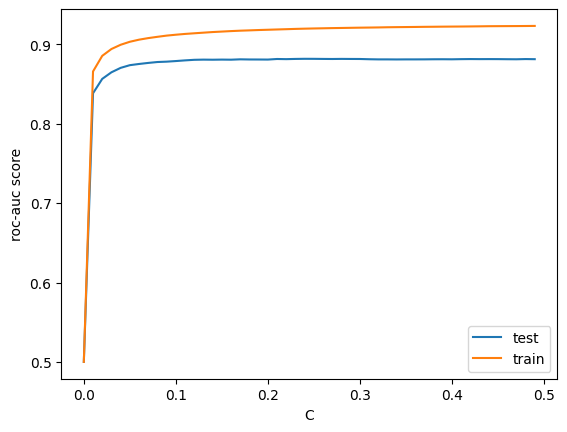

In [317]:
train_scores, valid_scores = validation_curve(estimator=LogisticRegression(), X=X_train, y=y_train, 
                                              param_name="C", param_range=np.arange(0, 0.5, 0.01), 
                                              cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

arr1 = list(map(np.mean, valid_scores))
arr2 = list(map(np.mean, train_scores))
arr3 = list(np.arange(0, 0.5, 0.01))
resdf = pd.DataFrame([arr1, arr2, arr3]).T.rename(columns={0:'test_score', 1:'train_score', 2:'C'})

fig, ax = plt.subplots()
line = sns.lineplot(data=resdf, y='test_score', x='C', ax=ax, ci=None)
line2 = sns.lineplot(data=resdf, y='train_score', x='C', ax=ax, ci=None)
ax.set_ylabel('roc-auc score')
ax.legend(['test', 'train'])

Тут похожая ситуация, видно что скор на тестовой с увеличением регуляризации не падает. Оставляем модель, подобранную ранее.

In [318]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("ROC-AUC score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True, random_state=17)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



<module 'matplotlib.pyplot' from 'C:\\Users\\Renat\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

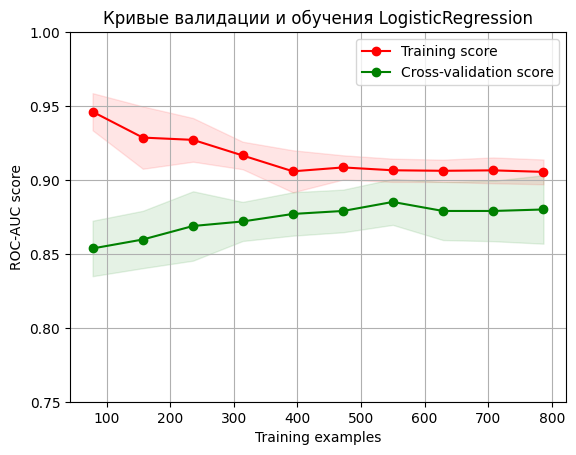

In [295]:
cv = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
LogReg = LogisticRegression(C=0.261)
plot_learning_curve(LogReg, 'Кривые валидации и обучения LogisticRegression', X_train, y_train, ylim=(0.75, 1), cv=cv, n_jobs=-1)

<module 'matplotlib.pyplot' from 'C:\\Users\\Renat\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

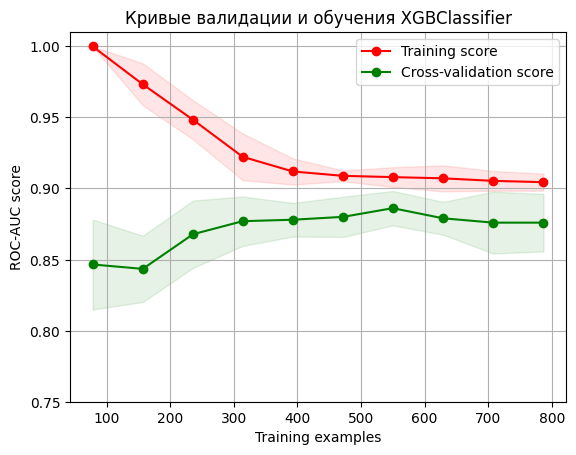

In [297]:
XGB = XGBClassifier(booster='gblinear', reg_alpha=0.002, reg_lambda=0.002)
plot_learning_curve(XGB, 'Кривые валидации и обучения XGBClassifier', X_train, y_train, ylim=(0.75, 1.01), cv=cv, n_jobs=-1)

Из графиков видно, что графики хорошо сошлись, зазор между тестовыми и трейновыми данными мал, что может свидетельствовать о недообученности модели. Но, так как при дальнейшем увеличении сложности модели скор на кросс валидации падает, решаю оставить модель как есть. Что же касается данных, для **данных** моделей их вполне **достаточно**, дальнейшее увеличение их количества скорее всего не приведет к увеличению качества модели

## Прогноз и оценка качества модели на тестовых данных

Для того, чтобы сделать прогноз, необходимо преобразовать тестовые данные к виду, подобному train данным

In [302]:
LabelEnc_col  = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
X_test_new = X_test.copy()
for i in LabelEnc_col:
    X_test_new[i] = X_test_new[i].map({1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'})
X_test_new = pd.get_dummies(X_test_new)
X_test = X_test_new

После всех преобразований у нас есть все необходимое, чтобы сделать конечный прогноз

In [303]:
from sklearn.metrics import roc_auc_score

In [304]:
LogReg = LogisticRegression(C=0.261)
LogReg.fit(X_train, y_train)
print(f'ROC-AUC score модели LogReg равна {roc_auc_score(LogReg.predict(X_test), y_test)}')

In [307]:
XGB = XGBClassifier(booster='gblinear', reg_alpha=0.002, reg_lambda=0.002)
XGB.fit(X_train, y_train)
print(f'ROC-AUC score модели XGB равна {roc_auc_score(XGB.predict(X_test), y_test)}')

### Выводы по качеству моделей

Как видно, модель логистической регрессии переобучилась, значение гиперпараметра необходимо было выбирать такое, где кривые валидации выходят на плато. В нашем же случае подобралось такое знаение, которое в моменте давало хорошие результаты.

Бустинг же оказался более устойчив к этому и показал вполне ожидаемые хорошие результаты.

В продолжение этой работы можно обучить модель catboost, возможно она покажет более хорошие результаты, т.к в наших данных после всех преобразований оказалось довольно много категориальных признаков.

Использовать данную модель могут спецаилисты HR-отдела, понимая, какой сотрудник с какой вероятностью может покинуть компанию, тем самым минимизируя кадровые риски компании.

Возможные улучшения:

- точнее отобрать значимые для модели признаки
- попробовать использовать дополнительные внешние данные, хоть ии на искусственном датасете это сделать нельзя (вуз, который закончил сотрудник, город)
- оценить, где алгоритм ошибается больше всего и скорректировать модель

## Заключительные мысли

Возможно, следует составить группы сотрудников по риску и ранжировать их. Сотрудникам, с самым высоким риском ухода из компании можно предлагать улучшенные условия работы и устранять факторы, способствующие уходу из компании. Ну или для каждой группы риска сформировать свою стратегию удержания сотрудников.